In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [111]:
df1=pd.read_csv("G:/Black friday sales/train.csv") #train data
df2=pd.read_csv("G:/Black friday sales/test.csv")  #test data
sub=pd.read_csv("G:/Black friday sales/sample.csv")  #sample submission file

<AxesSubplot:>

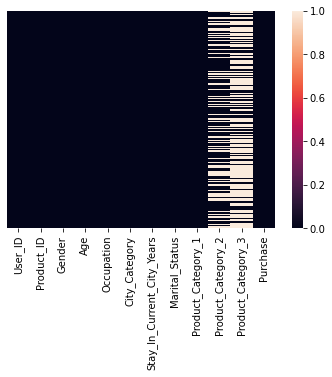

In [112]:
sns.heatmap(df1.isnull(), yticklabels=False )

<AxesSubplot:>

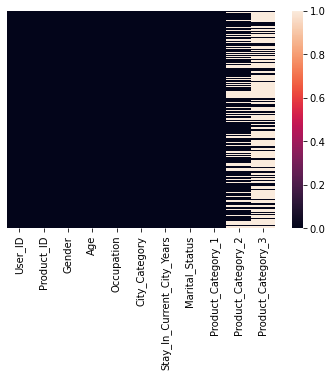

In [113]:
sns.heatmap(df2.isnull(), yticklabels=False )

In [114]:
categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O' ]
categorical_features2=[feature for feature in df2.columns if df2[feature].dtype=='O']

In [115]:
for c in categorical_feature:
    print ('\nFrequency of Categories for varible %s'%c)
    print (df1[c].value_counts())


Frequency of Categories for varible Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

Frequency of Categories for varible Gender
M    414259
F    135809
Name: Gender, dtype: int64

Frequency of Categories for varible Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Frequency of Categories for varible City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Frequency of Categories for varible Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [116]:
for c in categorical_feature:
    print ('\nFrequency of Categories for varible %s'%c)
    print (df2[c].value_counts())


Frequency of Categories for varible Product_ID
P00265242    829
P00112142    717
P00025442    695
P00110742    680
P00046742    646
            ... 
P00275042      1
P00181042      1
P00100242      1
P00008942      1
P00325442      1
Name: Product_ID, Length: 3491, dtype: int64

Frequency of Categories for varible Gender
M    175772
F     57827
Name: Gender, dtype: int64

Frequency of Categories for varible Age
26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64

Frequency of Categories for varible City_Category
B    98566
C    72509
A    62524
Name: City_Category, dtype: int64

Frequency of Categories for varible Stay_In_Current_City_Years
1     82604
2     43589
3     40143
4+    35945
0     31318
Name: Stay_In_Current_City_Years, dtype: int64


In [117]:
df1['City_Category']=df1['City_Category'].replace({'B':0,'C':1,'A':2})
df2['City_Category']=df2['City_Category'].replace({'B':0,'C':1,'A':2})
df1['Gender']=df1['Gender'].map({'M':0,'F':1})
df2['Gender']=df2['Gender'].map({'M':0,'F':1})
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].replace({1:0,2:1,3:2,'4+':3,0:4})
df2['Stay_In_Current_City_Years']=df2['Stay_In_Current_City_Years'].replace({1:0,2:1,3:2,'4+':3,0:4})

In [118]:
df1['Age']=df1['Age'].replace({'26-35':0,'36-45':1,'18-25':2,'46-50':3,'51-55':4,'55+':5,'0-17':6})
df2['Age']=df2['Age'].replace({'26-35':0,'36-45':1,'18-25':2,'46-50':3,'51-55':4,'55+':5,'0-17':6})

In [120]:
df1['Product_Category_2'].fillna(df1['Product_Category_2'].mean(),inplace=True)
df2['Product_Category_2'].fillna(df2['Product_Category_2'].mean(),inplace=True)

In [121]:
df1['Product_Category_3'].fillna(df1['Product_Category_3'].mean(),inplace=True)
df2['Product_Category_3'].fillna(df2['Product_Category_3'].mean(),inplace=True)

<AxesSubplot:>

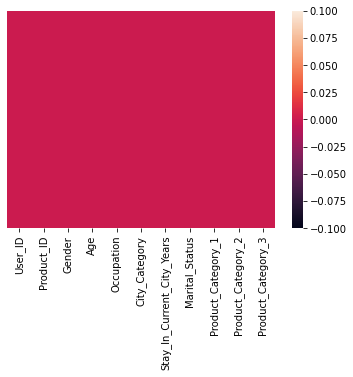

In [122]:
sns.heatmap(df2.isnull(), yticklabels=False )

<AxesSubplot:>

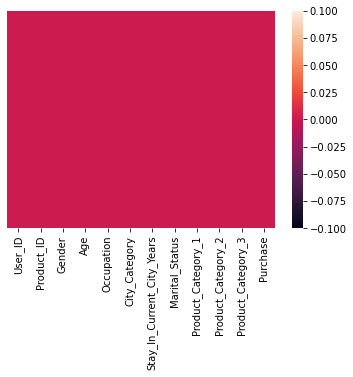

In [123]:
sns.heatmap(df1.isnull(), yticklabels=False )

<AxesSubplot:>

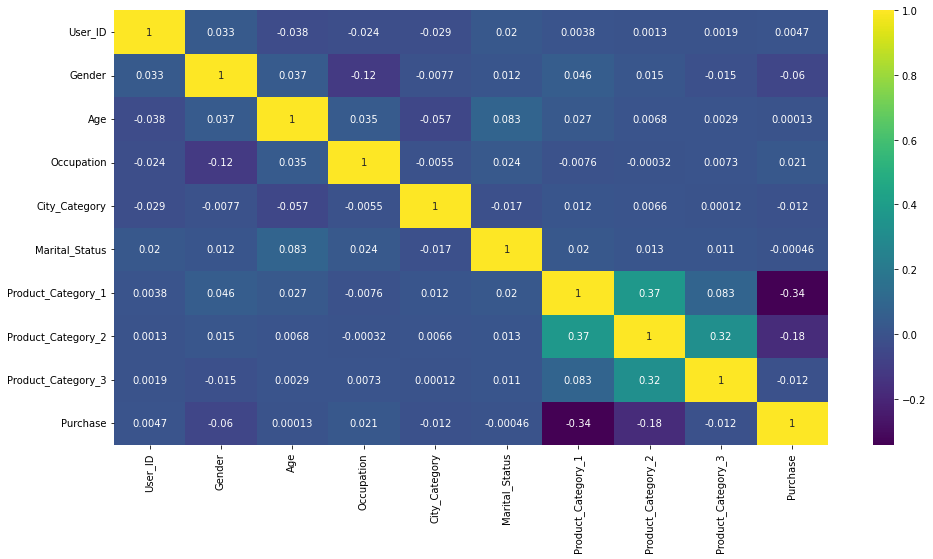

In [124]:
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

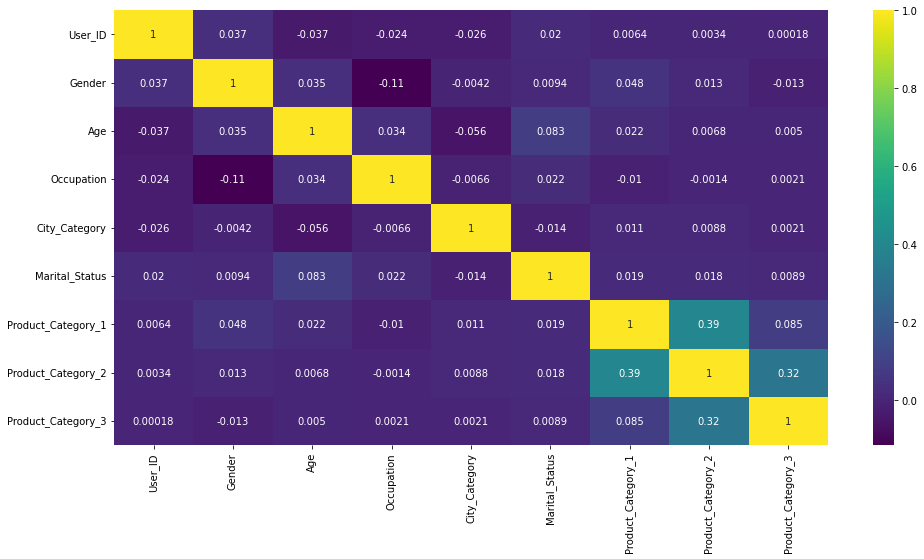

In [125]:
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(),annot=True,cmap='viridis')

In [126]:
#now we will split the data

In [164]:
X=df1.drop(['User_ID','Product_ID','Purchase'],axis=1)

In [165]:
y=df1['Purchase']

In [166]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [167]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [168]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [169]:
from sklearn.metrics import mean_squared_error, r2_score
mse_test=mean_squared_error(y_test,y_pred)
mse_train=mean_squared_error(y_train,y_pred_train)

In [170]:
mse_test

22180243.991763312

In [171]:
mse_train

22044453.01140784

In [172]:
r2_score_test=r2_score(y_test,y_pred)
r2_score_train=r2_score(y_train,y_pred_train)

In [173]:
r2_score_test

0.12347028322549713

In [174]:
r2_score_train

0.12520748273316196

In [175]:
rmse_test=mean_squared_error(y_test,y_pred,squared=False)
rmse_train=mean_squared_error(y_train,y_pred_train,squared=False)

In [176]:
rmse_test

4709.590639510329

In [177]:
rmse_train

4695.152075429276

In [182]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2_score / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2_score / variance :  0.12516884553292876
Residual sum of squares: 22180243.99


In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
cross_val_score(dtr, X_train, y_train, cv=10)

array([0.54632108, 0.56080888, 0.55216101, 0.54598359, 0.54381525,
       0.55184309, 0.54495986, 0.54297493, 0.55220761, 0.54979272])

In [154]:
y_pred=dtr.predict(X_test)
y_pred_train=dtr.predict(X_train)

In [155]:
rmse_test=mean_squared_error(y_test,y_pred)**.5
rmse_train=mean_squared_error(y_train,y_pred_train)**.5

In [156]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [157]:
y_pred=rf.predict(X_test)
y_pred_train=rf.predict(X_train)

In [158]:
rmse_test=mean_squared_error(y_test,y_pred, squared=False)
rmse_train=mean_squared_error(y_train,y_pred_train,squared=False)

In [159]:
#getting submission file

In [99]:
df3=df2.drop(['User_ID','Product_ID'],axis=1)

In [100]:
sub.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [101]:
y_pred3 = model.predict(df3)

In [102]:
y_pred3 

array([11194.5052174 , 10772.71667635,  8690.67275378, ...,
       11142.42554943,  6455.62625786,  9940.81426023])

In [103]:
df=pd.DataFrame(y_pred3,columns=['Purchase'])

In [105]:
df.head()

,Purchase
0,11194.505217
1,10772.716676
2,8690.672754
3,9533.252827
4,9668.210780


In [106]:
sub['Purchase']=df['Purchase']
sub.head()

,Purchase,User_ID,Product_ID
0,11194.505217,1000004,P00128942
1,10772.716676,1000009,P00113442
2,8690.672754,1000010,P00288442
3,9533.252827,1000010,P00145342
4,9668.210780,1000011,P00053842


In [107]:
sub.shape

(233599, 3)

In [108]:
sub.to_csv('G:/Black friday sales/submitted.csv',index=False)